In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras

from tensorflow.keras.utils import to_categorical
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

## 1 - Image Processing With Neural Networks

In [ ]:
from google.colab import files
files.upload()

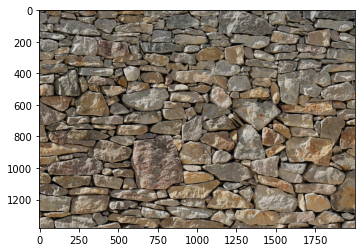

In [3]:
data = plt.imread('/content/bricks.jpg')
plt.imshow(data)
plt.show()

## 2 - Using Convolutions

## 3 - Going Deeper

## 4 - Understanding and Improving Deep Convolutional Networks